# 二手房分布分析
`data/second_hand_ house.csv`

- 朝向分布情况
- 首付分布情况
- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取数据
data = pd.read_csv('data/second_hand_ house.csv')
data

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370
...,...,...,...,...,...,...,...,...
70,598258845,三九花园,南,5833,12.6,42.0,114.089539,22.577080
71,594221866,三九花园,南,5681,15.0,50.0,114.089539,22.577080
72,606700179,城市春天,南北,3571,7.5,25.0,114.083405,22.539505
73,603950517,皇御苑,东北,59701,54.0,180.0,114.081795,22.531393


#### 绘制散点图
- 经度和维度作为x和y
- 按照房屋的单价控制大小  颜色按照参考总价

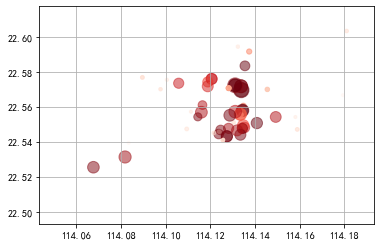

In [5]:
plt.scatter(data['经度'],
            data['纬度'], 
            s=data['房屋单价']/400, 
            c=data['参考总价'], # 总价越高,颜色越深
            alpha=0.5, # 透明度
            cmap="Reds")
plt.grid()

### 极差：max-min
- 只针对定量字段

In [8]:
### 房价首付的极差
data.参考首付.max() - data.参考首付.min()
data['参考首付'].max() - data['参考首付'].min()

52.5

In [7]:
### 房价总价的极差
data.参考总价.max() - data.参考总价.min()

175.0

#### 参考总价-频率分布情况
① 通过直方图直接判断分组组数

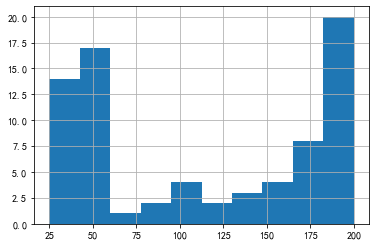

In [9]:
data.参考总价.hist(bins=10)
# 简单查看数据分布，确定分布组数 → 一般8-16即可

25.0
42.5
60.0
77.5
95.0
112.5
130.0
147.5
165.0
182.5


200.0

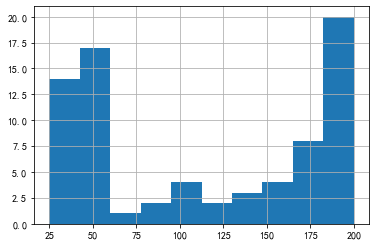

In [14]:
# 取得高度
d_hist = data.参考总价.hist(bins=10)
for d in d_hist.patches:
    # print(d.get_height())
    # 区间
    print(d.get_x())
data.参考总价.max()

###  也可以通过cut方法
pandas.cut使用总结

用途

pandas.cut用来把一组数据分割成离散的区间。比如有一组年龄数据，可以使用pandas.cut将年龄数据分割成不同的年龄段并打上标签。

第一个0表示1在第0个bin中

In [26]:
gcut = pd.cut(data['参考总价'],10,right=False)
gcut

0         [42.5, 60.0)
1         [25.0, 42.5)
2         [42.5, 60.0)
3         [25.0, 42.5)
4       [165.0, 182.5)
            ...       
70        [25.0, 42.5)
71        [42.5, 60.0)
72        [25.0, 42.5)
73      [165.0, 182.5)
74    [182.5, 200.175)
Name: 参考总价, Length: 75, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)]

In [19]:
gcut.value_counts

<bound method IndexOpsMixin.value_counts of 0         [42.5, 60.0)
1         [25.0, 42.5)
2         [42.5, 60.0)
3         [25.0, 42.5)
4       [165.0, 182.5)
            ...       
70        [25.0, 42.5)
71        [42.5, 60.0)
72        [25.0, 42.5)
73      [165.0, 182.5)
74    [182.5, 200.175)
Name: 参考总价, Length: 75, dtype: category
Categories (10, interval[float64]): [[25.0, 42.5) < [42.5, 60.0) < [60.0, 77.5) < [77.5, 95.0) ... [130.0, 147.5) < [147.5, 165.0) < [165.0, 182.5) < [182.5, 200.175)]>

In [20]:
gcut = pd.cut(data['参考总价'],10,right=False)
#gcut_count = gcut.value_counts(sort=False)  # 不排序
data['参考总价分组区间'] = gcut.values
data.head()

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,参考总价分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"


③  求出目标字段下频率分布的其他统计量 → 频数，频率，累计频率

分组区间,每个区间的频率

In [27]:
gcut_count = gcut.value_counts(sort=False)
gcut_count

[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [30]:
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)

In [32]:
r_zj['频数'].sum()

75

In [34]:
# 将gcut_count 转为DataFrame类型
r_zj = pd.DataFrame(gcut_count)
r_zj.rename(columns ={gcut_count.name:'频数'}, inplace = True)  # 修改频数字段名

r_zj['频率'] = r_zj / r_zj['频数'].sum()  # 计算频率

r_zj['累计频率'] = r_zj['频率'].cumsum()  # 计算累计频率

r_zj['频率%'] = r_zj['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_zj['累计频率%'] = r_zj['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_zj.style.bar(subset=['频率','累计频率'], color='green',width=100)

,频数,频率,累计频率,频率%,累计频率%
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.013333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.026667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.053333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.026667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.040000,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.053333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1.000000,26.67%,100.00%


In [36]:
r_zj['频率']

[25.0, 42.5)        0.186667
[42.5, 60.0)        0.226667
[60.0, 77.5)        0.013333
[77.5, 95.0)        0.026667
[95.0, 112.5)       0.053333
[112.5, 130.0)      0.026667
[130.0, 147.5)      0.040000
[147.5, 165.0)      0.053333
[165.0, 182.5)      0.106667
[182.5, 200.175)    0.266667
Name: 频率, dtype: float64

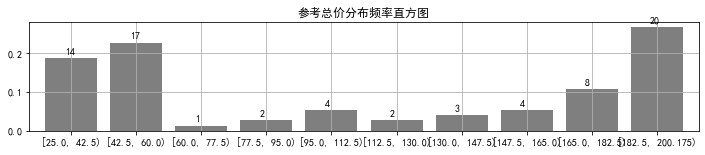

In [38]:
# 频率分布情况 - 定量字段
# ④ 绘制频率直方图
# 中文设置
r_zj['频率'].plot(kind = 'bar',
                 width = 0.8,
                 figsize = (12,2),
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')
# 绘制直方图

x = len(r_zj)
y = r_zj['频率']
m = r_zj['频数']
for i,j,k in zip(range(x),y,m):
    plt.text(i-0.1,j+0.01,'%i' % k, color = 'k')

In [39]:
# 频率分布情况 - 定性字段
# ① 通过计数统计判断不同类别的频率

cx_g = data['朝向'].value_counts(sort=True)
print(cx_g)
# 统计频率

r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns ={cx_g.name:'频数'}, inplace = True)  # 修改频数字段名
r_cx['频率'] = r_cx / r_cx['频数'].sum()  # 计算频率
r_cx['累计频率'] = r_cx['频率'].cumsum()  # 计算累计频率
r_cx['频率%'] = r_cx['频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示频率
r_cx['累计频率%'] = r_cx['累计频率'].apply(lambda x: "%.2f%%" % (x*100))  # 以百分比显示累计频率
r_cx.style.bar(subset=['频率','累计频率'], color='#d65f5f',width=100)

南北    29
南     20
东      8
东南     5
西南     4
北      4
西北     3
东北     1
东西     1
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率%,累计频率%
南北,29,0.386667,0.386667,38.67%,38.67%
南,20,0.266667,0.653333,26.67%,65.33%
东,8,0.106667,0.760000,10.67%,76.00%
东南,5,0.066667,0.826667,6.67%,82.67%
西南,4,0.053333,0.880000,5.33%,88.00%
北,4,0.053333,0.933333,5.33%,93.33%
西北,3,0.040000,0.973333,4.00%,97.33%
东北,1,0.013333,0.986667,1.33%,98.67%
东西,1,0.013333,1.000000,1.33%,100.00%


(-1.1101621526291232,
 1.1004839130571389,
 -1.1062755172910221,
 1.1205348076125872)

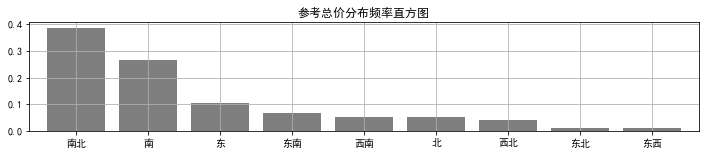

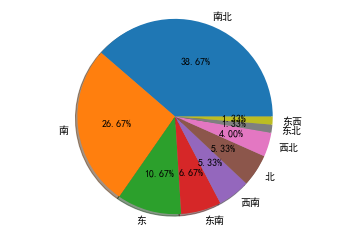

In [40]:
# 频率分布情况 - 定量字段
# ② 绘制频率直方图、饼图

plt.figure(num = 1,figsize = (12,2))
r_cx['频率'].plot(kind = 'bar',
                 width = 0.8,
                 rot = 0,
                 color = 'k',
                 grid = True,
                 alpha = 0.5)
plt.title('参考总价分布频率直方图')
# 绘制直方图

plt.figure(num = 2)
plt.pie(r_cx['频数'],
       labels = r_cx.index,
       autopct='%.2f%%',
       shadow = True)



plt.axis('equal')

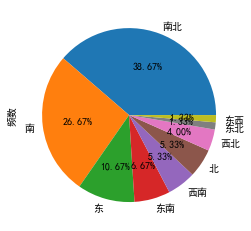

In [42]:
r_cx['频数'].plot(kind="pie", autopct='%.2f%%',)